In [1]:
import pandas as pd
import numpy as np
import json
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# mpl.rcParams["font.size"] = 20

import statsmodels.stats.anova as anova
from  scipy.stats import chi2_contingency
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.formula.api import ols
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# 1.加载数据

In [2]:
# 合并json文件存储为表格
# path = glob.glob(r'E:\data\NLP')


name = []   #作者姓名
year = []   #年份
mv = []   #M_value
ev = []   #E_value
ev_ = []   #作者顺序
df = pd.DataFrame()  #合并文件

# 读取每个文件
for i in range(5000,350000,5000):
#     E:\data\NLP\NLP_100000.json
#文件读取路径
    file = f'E:\\data\\astronomy\\astronomy_{i}.json'
    print(file)
    data = json.load(open(file,'r'))
    for key in data.keys():
        author = data[key]
        item = author[0]
        
        cnt = 1
        for i in item['authors']:
            name.append(i['name'])
            year.append(item['year'])
            mv.append(item['M_value'])
            ev.append(item['E_value'])
            ev_.append(cnt)
            cnt += 1
    
# 存储新文件
df['name'] = name
df['year'] = year
df['M_value'] = mv
df['E_value1'] = ev
df['E_value2'] = ev_
df.to_csv(r'E:\data\as_result_new_1.csv', index=0)
print("finish")

E:\data\astronomy\astronomy_5000.json
E:\data\astronomy\astronomy_10000.json
E:\data\astronomy\astronomy_15000.json
E:\data\astronomy\astronomy_20000.json
E:\data\astronomy\astronomy_25000.json
E:\data\astronomy\astronomy_30000.json
E:\data\astronomy\astronomy_35000.json
E:\data\astronomy\astronomy_40000.json
E:\data\astronomy\astronomy_45000.json
E:\data\astronomy\astronomy_50000.json
E:\data\astronomy\astronomy_55000.json
E:\data\astronomy\astronomy_60000.json
E:\data\astronomy\astronomy_65000.json
E:\data\astronomy\astronomy_70000.json
E:\data\astronomy\astronomy_75000.json
E:\data\astronomy\astronomy_80000.json
E:\data\astronomy\astronomy_85000.json
E:\data\astronomy\astronomy_90000.json
E:\data\astronomy\astronomy_95000.json
E:\data\astronomy\astronomy_100000.json
E:\data\astronomy\astronomy_105000.json
E:\data\astronomy\astronomy_110000.json
E:\data\astronomy\astronomy_115000.json
E:\data\astronomy\astronomy_120000.json
E:\data\astronomy\astronomy_125000.json
E:\data\astronomy\as

In [3]:
# 分组后的文件
data_new = pd.read_csv(r'E:\data\as_result_new_1.csv')

# 每个作者的学术年龄，取age>=6
name = data_new.groupby('name')['year'].agg(['min','max'])
name['age'] = name['max'] - name['min']+1
name = name[name['age']>=6]
data_new = data_new.merge(name, how='left', left_on='name', right_on=name.index)
data_new = data_new.dropna(axis = 0, subset = ['age'])

# Group1:学术年龄，Group2:学术生涯
data_new['gap'] = data_new['year'] - data_new['min'] + 1
data_new['group1'] = data_new.apply(lambda x: x['age']//5 if x['age']%5 != 0 else x['age']//5-1, axis=1)
data_new['group2'] = data_new.apply(lambda x: x['gap']//5+1 if x['gap']%5 != 0 else x['gap']//5, axis=1)

In [4]:
# min:该作者最小年份
# max:该作者最大年份
# age:该作者学术年龄
# gap:当前文章聚该作者最小年份的间隔
data_new.describe()

,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2
count,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06,4.218400e+06
mean,2.011752e+03,3.834243e-03,7.887085e+00,2.258378e+02,2.001515e+03,2.015515e+03,1.500004e+01,1.123674e+01,2.410555e+00,2.667513e+00
std,5.403491e+00,3.325228e-03,4.566402e+00,2.699818e+02,8.078142e+00,2.848093e+00,7.790731e+00,7.789367e+00,1.567826e+00,1.555217e+00
min,1.934000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.934000e+03,1.940000e+03,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.010000e+03,1.148000e-03,4.644257e+00,2.200000e+01,1.998000e+03,2.016000e+03,9.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00
50%,2.013000e+03,2.706000e-03,7.657038e+00,1.020000e+02,2.004000e+03,2.016000e+03,1.300000e+01,1.000000e+01,2.000000e+00,2.000000e+00
75%,2.016000e+03,6.557000e-03,1.121826e+01,3.590000e+02,2.007000e+03,2.017000e+03,1.900000e+01,1.500000e+01,3.000000e+00,3.000000e+00
max,2.017000e+03,1.996000e-02,5.078250e+01,1.541000e+03,2.012000e+03,2.017000e+03,6.500000e+01,6.500000e+01,1.200000e+01,1.300000e+01


# 2.M_value

Group 1 :中位数: 0.003143 ,均值: 0.0041279854080944105 最大值 0.01996 最小值: 0.0
Group 2 :中位数: 0.003397 ,均值: 0.004168054485577703 最大值 0.018043 最小值: 0.0
Group 3 :中位数: 0.002539 ,均值: 0.003480129044414136 最大值 0.01996 最小值: 0.0
Group 4 :中位数: 0.0023805 ,均值: 0.003285360374387148 最大值 0.017723 最小值: 0.0
Group 5 :中位数: 0.00201 ,均值: 0.0030117624070121634 最大值 0.018043 最小值: 0.0
Group 6 :中位数: 0.001724 ,均值: 0.0027230576710627944 最大值 0.017723 最小值: 0.0


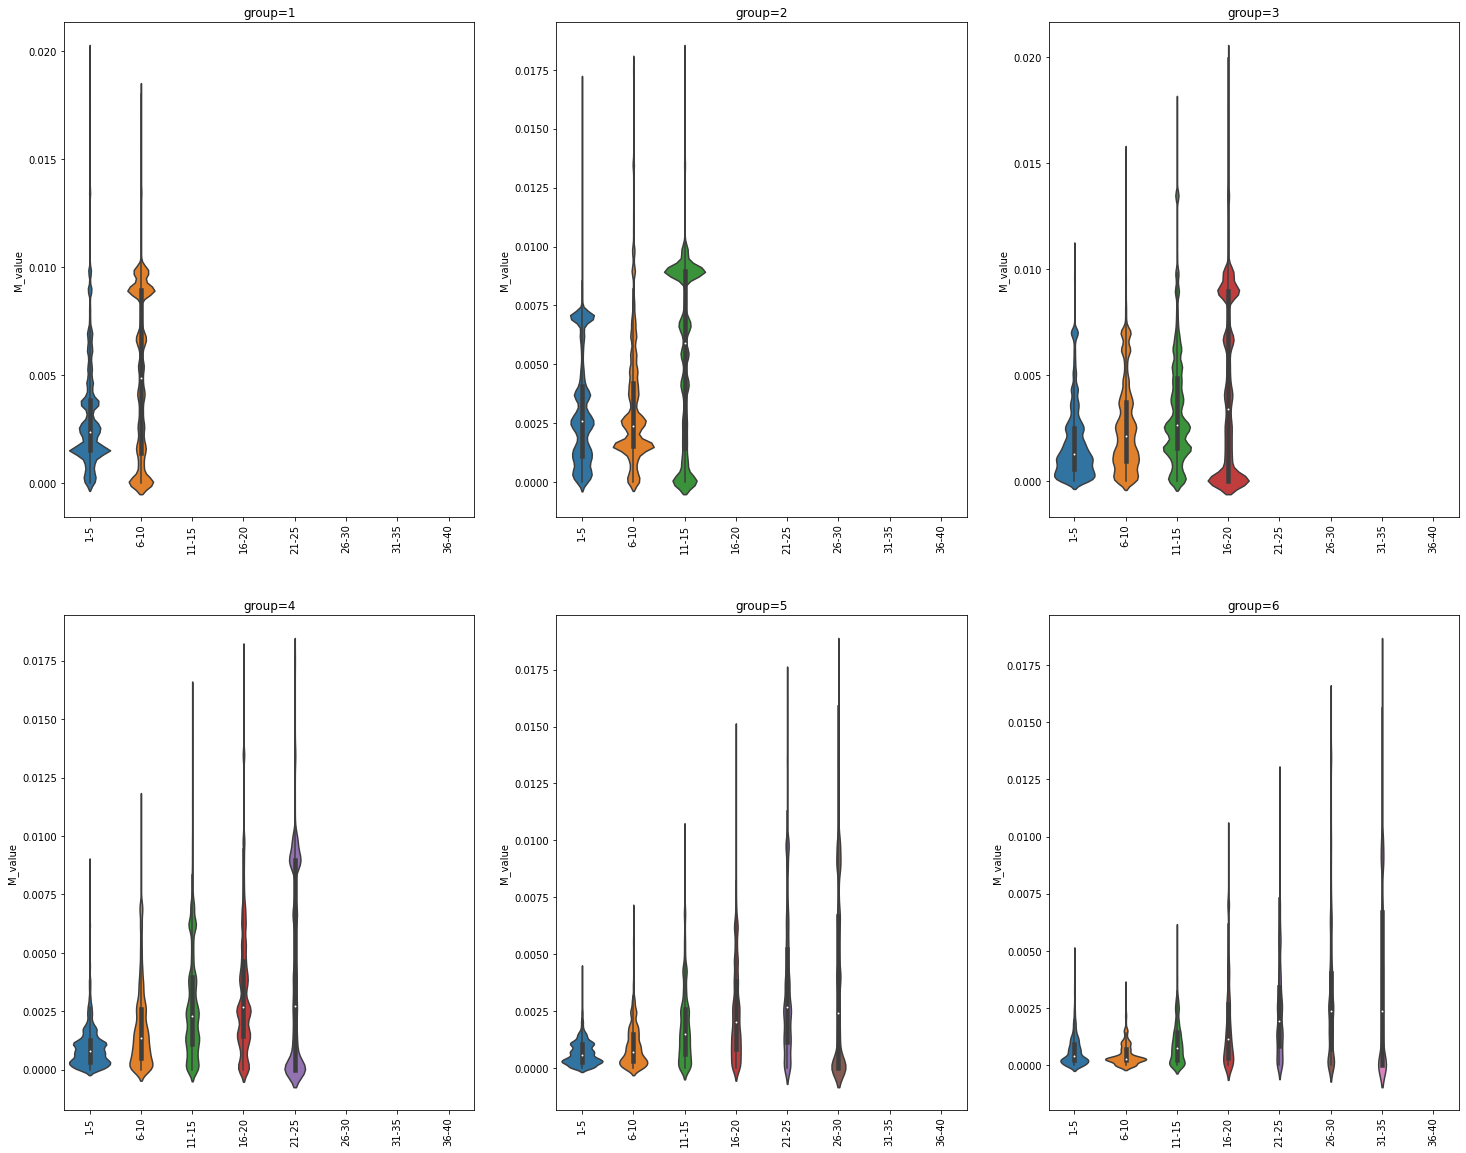

In [5]:
# M_value处理
def median(l):
    l = sorted(l)

    if len(l)%2 == 0:
        mid = (sorted(l)[int(len(l)//2)] + sorted(l)[int(len(l)//2)-1])/2
    else:
        mid = sorted(l)[int(len(l)/2)]
    return mid

def mode(l):
    l = sorted(l)
    return l[-1]

dic = {1:'1-5',2:'6-10',3:'11-15',4:'16-20',5:'21-25',6:'26-30',7:'31-35',8:'36-40'}
fig1,ax1 = plt.subplots(nrows=2, ncols=3, figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].M_value
    sns.violinplot(x=x1.map(dic), y=x2, ax=ax1[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40'])
    ax1[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax1[(i-1)//3,i%3-1].set_xlabel('')
    ax1[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)
    
for m in range(1, 7):
    mvalues = []
    value = []
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].M_value
        if len(mvalue)==0: continue
        mvalues += mvalue.to_list()
    if len(mvalues)==0: continue
    mvalues = np.array(mvalues)
    value.append(median(mvalues))
    value.append(mvalues.mean())
    value.append(max(mvalues))
    value.append(min(mvalues))
    print("Group",str(m),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

                 df    sum_sq   mean_sq           F  PR(>F)
C(group1)      11.0  0.261905  0.023810  4366.96227     0.0
Residual   943966.0  5.146682  0.000005         NaN     NaN


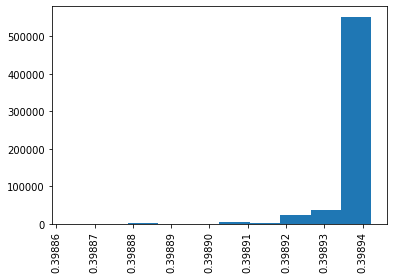

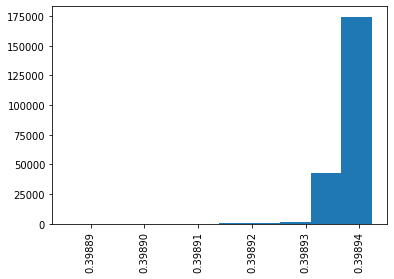

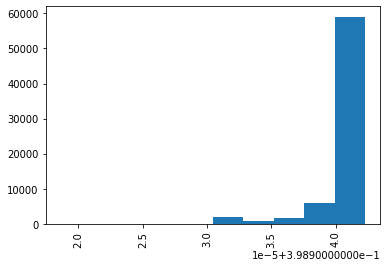

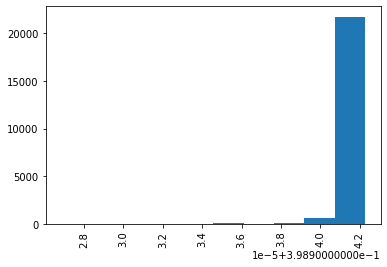

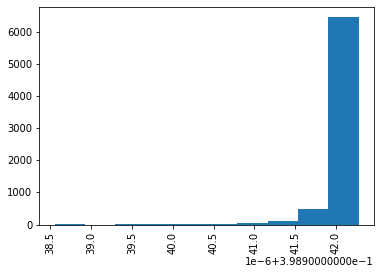

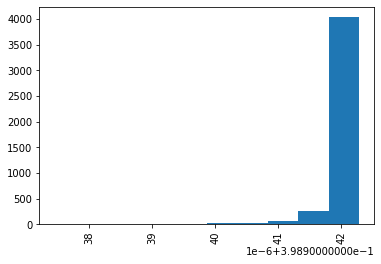

In [6]:
# 显著性差异检验
d1 = data_new[data_new['group2']==1].loc[:,['M_value','group1']]
model1 = ols('M_value ~ C(group1)', data=d1).fit()
anova1 = anova.anova_lm(model1)
print(anova1)

# 概率密度函数
M_pdfs =[]  #存储每组M_value的PDF
for i in range(1,7):
    d = d1[d1['group1']==i]
    M_pdfs.append(st.norm.pdf(d['M_value']))
M_pdfs = np.array(M_pdfs)
for i in range(len(M_pdfs)):
    plt.hist(M_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 3.E_value

Group 1 :中位数: 0.04326010447457627 ,均值: 0.3832161260261126 最大值 33.59580871 最小值: 0.0
Group 2 :中位数: 0.044370420420792075 ,均值: 0.4145028620993177 最大值 39.38814029 最小值: 0.0
Group 3 :中位数: 0.07793760804347825 ,均值: 0.5665078927172399 最大值 50.78249501 最小值: 0.0
Group 4 :中位数: 0.09337326625263158 ,均值: 0.6170182767849808 最大值 33.09809894 最小值: 0.0
Group 5 :中位数: 0.117338967 ,均值: 0.7133813577442154 最大值 31.81858977 最小值: 0.0
Group 6 :中位数: 0.11377147011666666 ,均值: 0.7264674420268502 最大值 25.25719236 最小值: 0.0


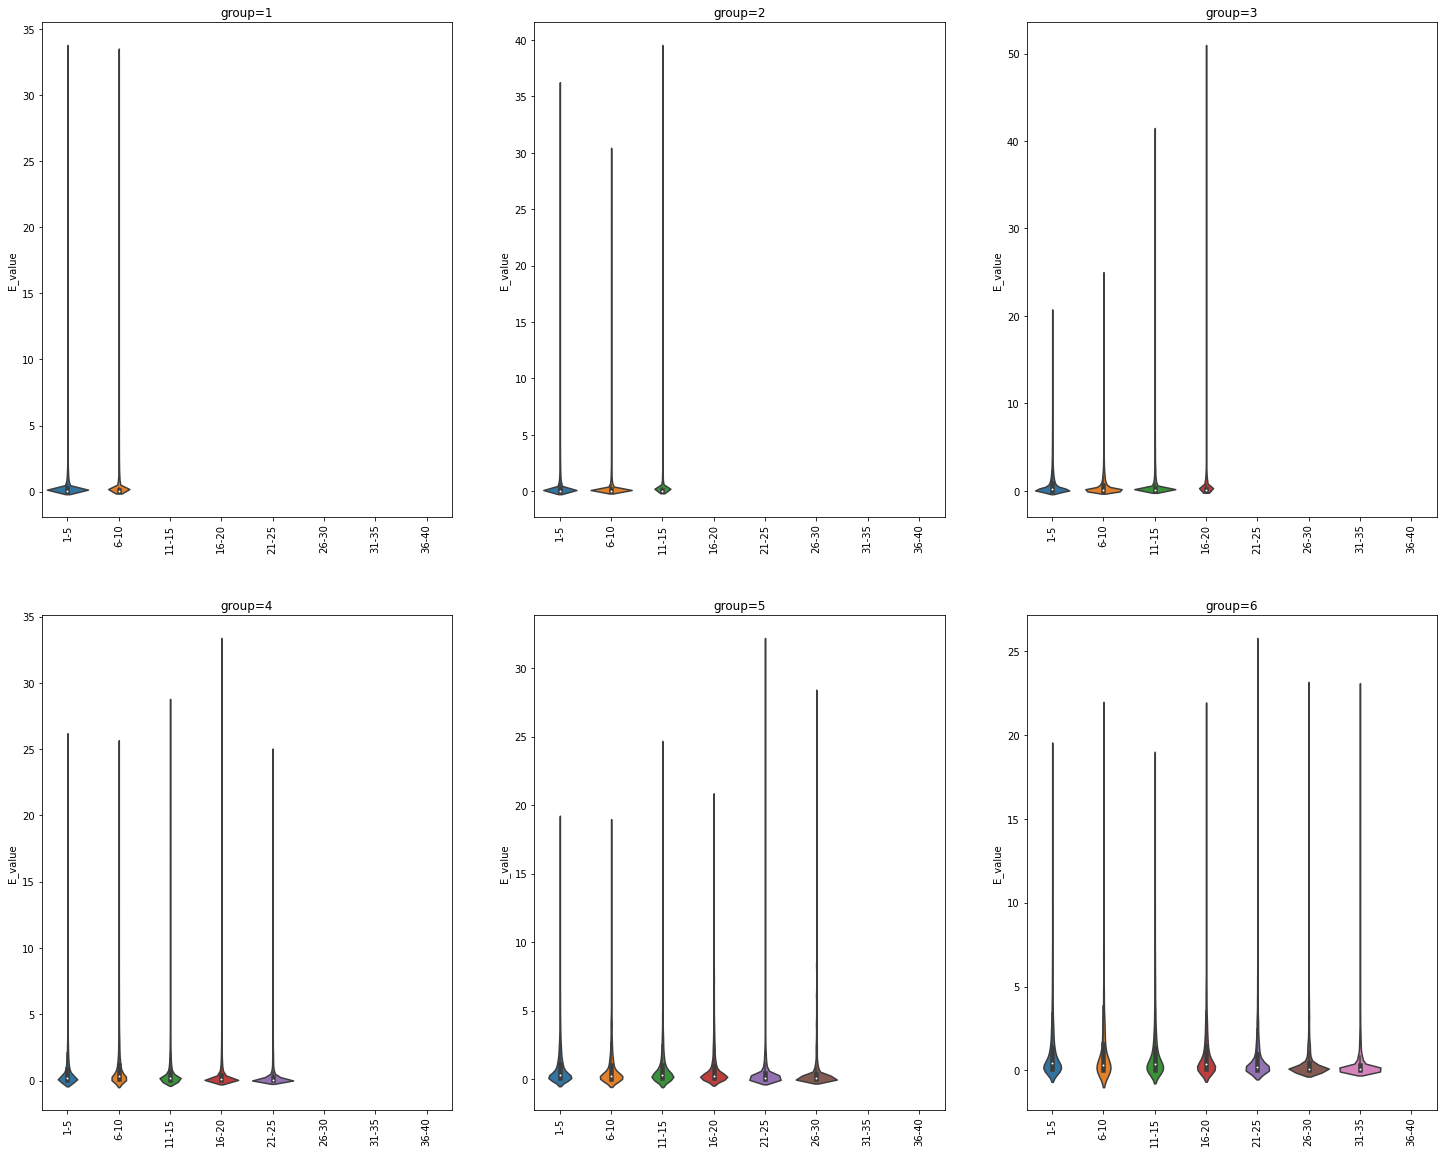

In [7]:
# 计算真正E_value
data_new['E_value'] = data_new['E_value1']*(1/data_new['E_value2'])

# E_value处理
fig2,ax2 = plt.subplots(nrows=2, ncols=3,figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].E_value
    sns.violinplot(x=x1.map(dic), y=x2, ax=ax2[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']) #boxplot显示不清楚，这里用了violinplot
    ax2[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax2[(i-1)//3,i%3-1].set_xlabel('')
    ax2[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)
    
for m in range(1, 7):
    mvalues = []
    value = []
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].E_value
        if len(mvalue)==0: continue
        mvalues += mvalue.to_list()
    if len(mvalues)==0: continue
    mvalues = np.array(mvalues)
    value.append(median(mvalues))
    value.append(mvalues.mean())
    value.append(max(mvalues))
    value.append(min(mvalues))
    print("Group",str(m),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

                 df        sum_sq      mean_sq           F  PR(>F)
C(group1)      11.0  2.053732e+04  1867.028933  855.331005     0.0
Residual   943966.0  2.060503e+06     2.182815         NaN     NaN


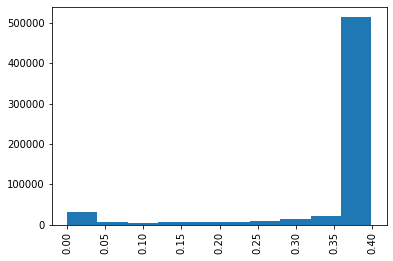

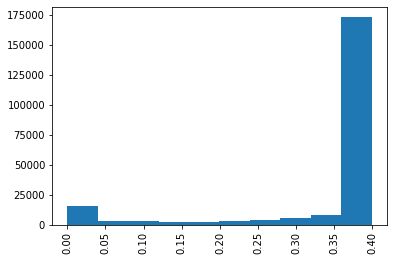

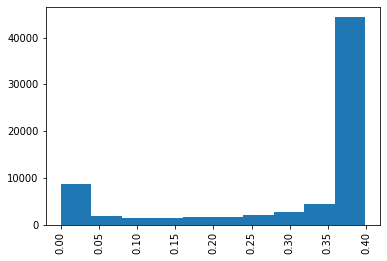

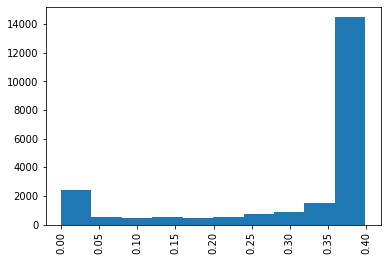

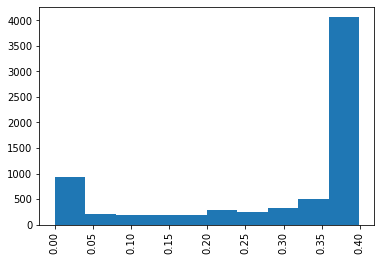

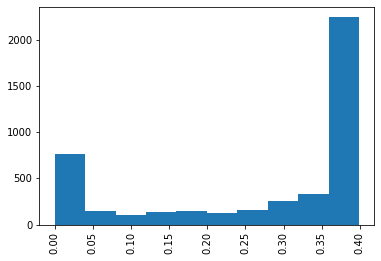

In [8]:
# 显著性差异检验
d2 = data_new[data_new['group2']==1].loc[:,['E_value','group1']]
model2 = ols('E_value ~ C(group1)', data=d2).fit()
anova2 = anova.anova_lm(model2)
print(anova2)

# 概率密度函数
E_pdfs =[]  #存储每组E_value的PDF
for i in range(1,7):
    d = d2[d2['group1']==i]
    E_pdfs.append(st.norm.pdf(d['E_value']))
    
E_pdfs = np.array(E_pdfs)
for i in range(len(E_pdfs)):
    plt.hist(E_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 4.Stage

In [9]:
# 计算每个阶段的rank
def rank(r,l):
    if r<= 0.2*l: return 1
    elif r<= 0.4*l: return 2
    elif r<= 0.6*l: return 3
    elif r<=0.8*l: return 4
    else: return 5
    
for i in range(1,9):
    stage = data_new[data_new['group2']==i].groupby(['name'])['E_value'].sum().sort_values()
    d = dict()
    l = len(stage)
    c = 1
    for j in stage.index:
        r = rank(c,l)
        d[j]=r
        c += 1
    col = 's'+str(i)
    data_new[col] = data_new['name'].map(d)

# 没有的用0填充
data_new = data_new.fillna(0)

In [10]:
# E_value:作者真实E_value
# s1-s8: 该作者每个阶段的stage
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2,E_value,s1,s2,s3,s4,s5,s6,s7,s8
0,F. R. Harnden,2001,0.003613,3.328726,1,1999.0,2008.0,10.0,3.0,1.0,1.0,3.328726,4,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nancy R. Adams,2001,0.003613,3.328726,2,2001.0,2008.0,8.0,1.0,1.0,1.0,1.664363,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F. Damiani,2001,0.003613,3.328726,3,2000.0,2017.0,18.0,2.0,3.0,1.0,1.109575,4,4.0,2.0,4.0,0.0,0.0,0.0,0.0
3,Jeremy J. Drake,2001,0.003613,3.328726,4,2000.0,2017.0,18.0,2.0,3.0,1.0,0.832182,5,5.0,5.0,4.0,0.0,0.0,0.0,0.0
4,Nancy Remage Evans,2001,0.003613,3.328726,5,2001.0,2016.0,16.0,1.0,3.0,1.0,0.665745,4,5.0,4.0,4.0,0.0,0.0,0.0,0.0


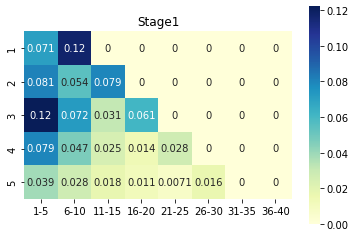

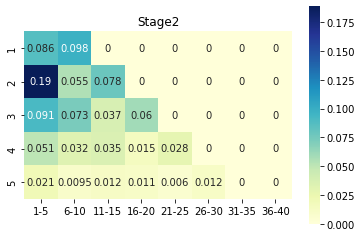

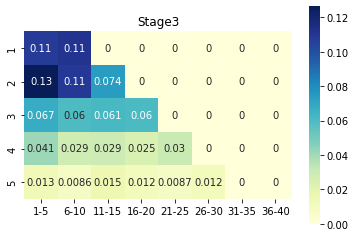

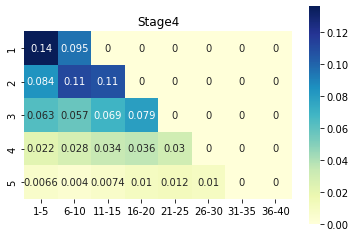

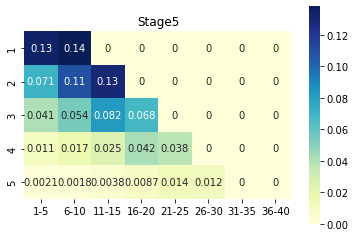

In [11]:
#概率分布热力图
# fig3, ax3 = plt.subplots(nrows=1,ncols=6)
for s in range(1,6):
    # stage1-5
    y = [1,2,3,4,5]
    x = ['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']
    temp = []
    for i in range(1,6):
        # 计算各组stage的概率
        t = []
        for j in range(1,9):
            # 计算各组不同阶段stage的概率
            c = 's'+str(j)
            t.append(data_new[data_new['group1']==i][c].to_list().count(s))
        temp.append(t)
    temp = np.array(temp)
    temp = np.divide(temp, temp.sum())
    temp = pd.DataFrame(columns=x, index=y,data=temp)
    plt.title('Stage'+str(s))
    sns.heatmap(temp, cmap='YlGnBu',square=True, annot=True,annot_kws={'size':10})
    plt.show()

In [12]:
#Stage显著性检验
cols = ['s1','s2','s3','s4','s5','s6','s7','s8']
kt= chi2_contingency(data_new.loc[:,cols])
print('卡方值=%.4f, p值=%.4f, 自由度=%i expected_frep=%s'%kt)

卡方值=63029415.4537, p值=0.0000, 自由度=29528793 expected_frep=[[2.04287627 2.02427427 1.43833388 ... 0.17334831 0.10475349 0.0561263 ]
 [1.16735787 1.15672815 0.82190507 ... 0.09905618 0.05985914 0.03207217]
 [4.08575254 4.04854853 2.87666776 ... 0.34669662 0.20950698 0.1122526 ]
 ...
 [4.96127094 4.91609465 3.49309657 ... 0.42098875 0.25440133 0.13630673]
 [4.08575254 4.04854853 2.87666776 ... 0.34669662 0.20950698 0.1122526 ]
 [0.8755184  0.86754611 0.61642881 ... 0.07429213 0.04489435 0.02405413]]


# 6.相关与回归分析

In [13]:
# 计算各阶段E_value之和
d = data_new.groupby(['group2','name'])['E_value'].sum()
d = pd.DataFrame(d)
data_new = data_new.merge(d,how='left',on=['group2','name'])
data_new = data_new.rename(columns={'E_value_x':'E_value','E_value_y':'Sum_E'})

# Sum_E:该作者在当前阶段E_value的和
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,...,E_value,s1,s2,s3,s4,s5,s6,s7,s8,Sum_E
0,F. R. Harnden,2001,0.003613,3.328726,1,1999.0,2008.0,10.0,3.0,1.0,...,3.328726,4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673575
1,Nancy R. Adams,2001,0.003613,3.328726,2,2001.0,2008.0,8.0,1.0,1.0,...,1.664363,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.328726
2,F. Damiani,2001,0.003613,3.328726,3,2000.0,2017.0,18.0,2.0,3.0,...,1.109575,4,4.0,2.0,4.0,0.0,0.0,0.0,0.0,8.972121
3,Jeremy J. Drake,2001,0.003613,3.328726,4,2000.0,2017.0,18.0,2.0,3.0,...,0.832182,5,5.0,5.0,4.0,0.0,0.0,0.0,0.0,54.261580
4,Nancy Remage Evans,2001,0.003613,3.328726,5,2001.0,2016.0,16.0,1.0,3.0,...,0.665745,4,5.0,4.0,4.0,0.0,0.0,0.0,0.0,7.692378


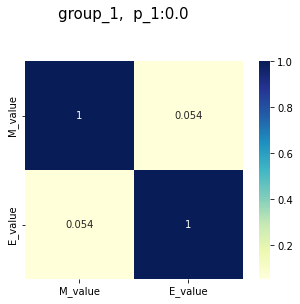

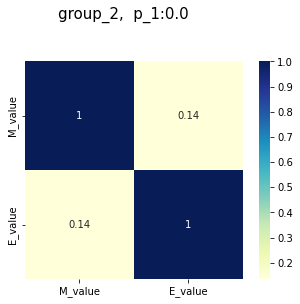

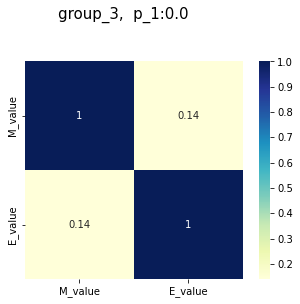

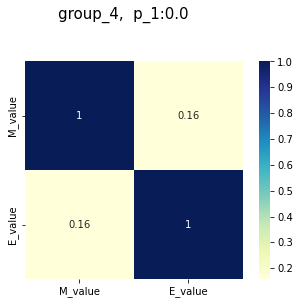

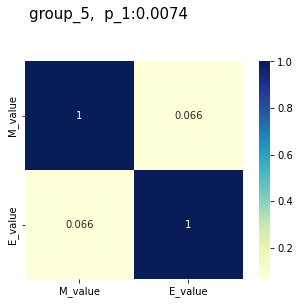

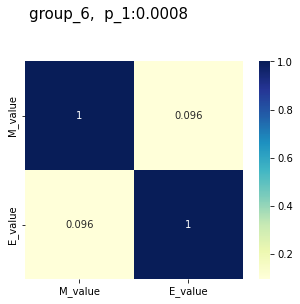

In [21]:
for i in range(1,7):
    temp = data_new[data_new['group1']==i]
    d1 = pd.DataFrame(temp[temp['group2']==1].groupby('name')['M_value'].sum())
    d2 = pd.DataFrame(temp[temp['group2']!=1].groupby('name')['E_value'].sum())
    temp = d1.merge(d2, how='outer', left_on=d1.index, right_on=d2.index)
    
    r,p = stats.pearsonr(temp.M_value, temp.E_value)
    p = round(p,4)
    s = "group_"+str(i)+",  p_1:"+str(p)
    plt.text(1.5,-0.5,s,fontsize=15,verticalalignment="top",horizontalalignment="right")
    sns.heatmap(temp.loc[:,['M_value', 'E_value']].corr(), cmap='YlGnBu',square=True, annot=True)
    plt.show()

In [22]:
# 用线性回归分析M_value与各阶段E_value之和的回归关系
for i in range(1,7):
    print("******************"+"Group"+str(i)+"******************")
    temp = data_new[data_new['group1']==i]
    d1 = pd.DataFrame(temp[temp['group2']==1].groupby('name')['M_value'].sum())
    d2 = pd.DataFrame(temp[temp['group2']!=1].groupby('name')['E_value'].sum())
    temp = d1.merge(d2, how='outer', left_on=d1.index, right_on=d2.index)
    
    model3=ols('E_value~M_value',data=temp).fit()
    print(model3.summary())

******************Group1******************
                            OLS Regression Results                            
Dep. Variable:                E_value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     51.02
Date:                Wed, 11 May 2022   Prob (F-statistic):           9.51e-13
Time:                        22:50:10   Log-Likelihood:                -95218.
No. Observations:               17178   AIC:                         1.904e+05
Df Residuals:                   17176   BIC:                         1.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

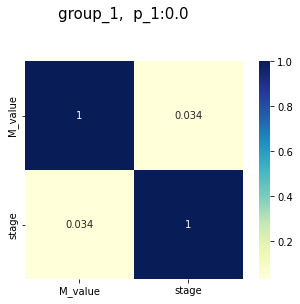

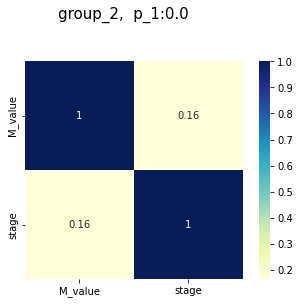

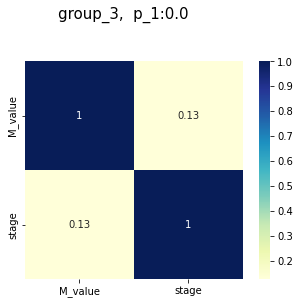

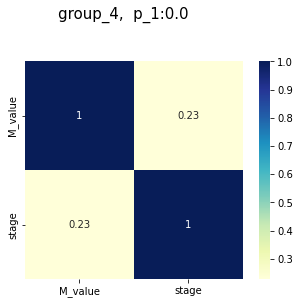

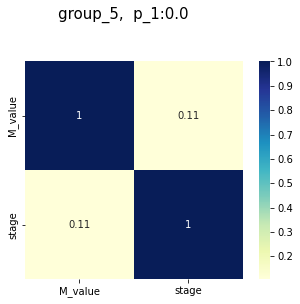

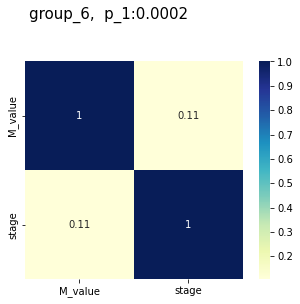

In [16]:
# 阶段1的Mvalue与阶段2-8的stage平均数的相关和回归
for i in range(1,7):
    temp = data_new[data_new['group1']==i]
    d1 = pd.DataFrame(temp[temp['group2']==1].groupby('name')['M_value'].sum())
    d2 = temp.loc[:,['name','s2','s3','s4','s5','s6','s7','s8']].groupby('name').mean()
    d2 = pd.DataFrame(d2.mean(axis = 1),columns=['stage'])
    temp = d1.merge(d2, how='outer', left_on=d1.index, right_on=d2.index)
    
    r,p = stats.pearsonr(temp.M_value, temp.stage)
    p = round(p,4)
    s = "group_"+str(i)+",  p_1:"+str(p)
    plt.text(1.5,-0.5,s,fontsize=15,verticalalignment="top",horizontalalignment="right")
    sns.heatmap(temp.loc[:,['M_value', 'stage']].corr(), cmap='YlGnBu',square=True, annot=True)
    plt.show()

# 用有序logistic回归分析M_value与各阶段stage的回归关系。
for i in range(1,7):
    temp = data_new[data_new['group1']==i]
    d1 = pd.DataFrame(temp[temp['group2']==1].groupby('name')['M_value'].sum())
    d2 = temp.loc[:,['name','s2','s3','s4','s5','s6','s7','s8']].groupby('name').mean()
    d2 = pd.DataFrame(d2.mean(axis = 1),columns=['stage'])
    temp = d1.merge(d2, how='outer', left_on=d1.index, right_on=d2.index)
    
    print("******************"+"Group"+str(i)+"******************")
    temp = temp[temp['stage']<=1]
    logit = sm.Logit(temp.M_value,temp.stage).fit()
    print(logit.summary())
    sns.regplot(x='M_value',y='stage',data = temp)
    plt.show()

******************Group1******************
Optimization terminated successfully.
         Current function value: 0.691516
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                17178
Model:                          Logit   Df Residuals:                    17177
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                 -0.1628
Time:                        23:06:41   Log-Likelihood:                -11879.
converged:                       True   LL-Null:                       -10216.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value       -0.2374      0.047     -5.062      0.000      -0.32

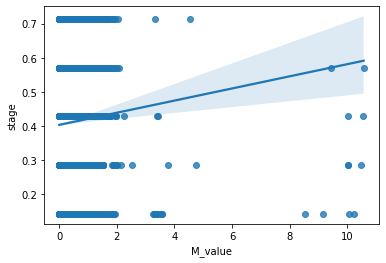

******************Group2******************
Optimization terminated successfully.
         Current function value: 0.681809
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                 7877
Model:                          Logit   Df Residuals:                     7876
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.02898
Time:                        23:06:42   Log-Likelihood:                -5370.6
converged:                       True   LL-Null:                       -5219.4
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value        1.5770      0.186      8.463      0.000       1.21

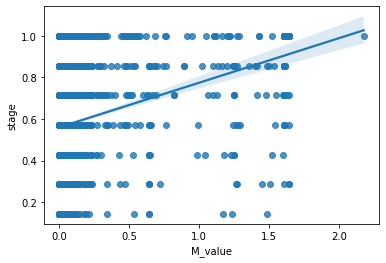

******************Group3******************
Optimization terminated successfully.
         Current function value: 0.672491
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                 3229
Model:                          Logit   Df Residuals:                     3228
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.05262
Time:                        23:06:46   Log-Likelihood:                -2171.5
converged:                       True   LL-Null:                       -2062.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value       14.7691      2.115      6.984      0.000      10.62

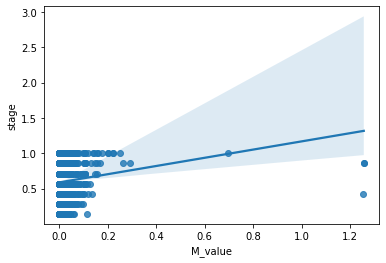

******************Group4******************
Optimization terminated successfully.
         Current function value: 0.689683
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1319
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.03745
Time:                        23:06:46   Log-Likelihood:                -910.38
converged:                       True   LL-Null:                       -877.52
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value       15.1332      6.849      2.210      0.027       1.71

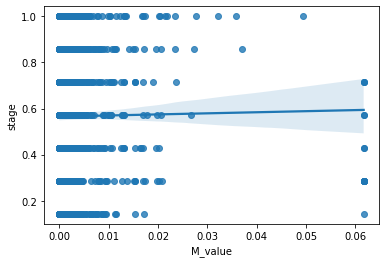

******************Group5******************
Optimization terminated successfully.
         Current function value: 0.679459
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                  704
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.05675
Time:                        23:06:46   Log-Likelihood:                -478.34
converged:                       True   LL-Null:                       -452.65
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value       61.2430     18.997      3.224      0.001      24.00

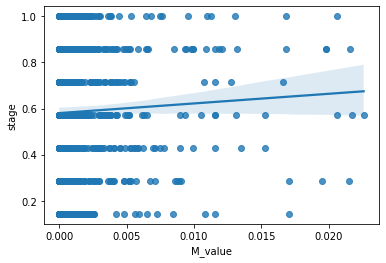

******************Group6******************
Optimization terminated successfully.
         Current function value: 0.668156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  stage   No. Observations:                  410
Model:                          Logit   Df Residuals:                      409
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.01253
Time:                        23:06:47   Log-Likelihood:                -273.94
converged:                       True   LL-Null:                       -270.55
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_value      108.5258     34.260      3.168      0.002      41.37

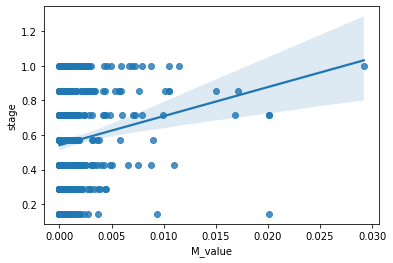

In [25]:
# 用有序logistic回归分析M_value与各阶段stage的回归关系。
for i in range(1,7):
    temp = data_new[data_new['group1']==i]
    d1 = pd.DataFrame(temp[temp['group2']==1].groupby('name')['M_value'].sum())
    d2 = temp.loc[:,['name','s2','s3','s4','s5','s6','s7','s8']].groupby('name').mean()
    d2 = pd.DataFrame(d2.mean(axis = 1),columns=['stage'])
    temp = d1.merge(d2, how='outer', left_on=d1.index, right_on=d2.index)
    
    print("******************"+"Group"+str(i)+"******************")
    temp = temp[temp['stage']<=1]
    logit = sm.Logit(temp.stage,temp.M_value).fit()
    print(logit.summary())
    sns.regplot(x='M_value',y='stage',data = temp)
    plt.show()